In [10]:
import os
import pandas as pd
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt

In [36]:
def test_regression(
    df,
    DV='like_count',
    IV='novelty_median',
    controls=['post_count','gender'],
    curvilinear=False):

    df = df[~df[IV].isin([np.inf,np.NaN])].copy()
    print('N =',df.shape[0])
    print('DV =',DV)
    print('IV =',IV)
    print('CV =',controls)

    if curvilinear: 
        df.loc[:,f'{IV}_sqr'] = np.square(df[IV])
        lm = pg.linear_regression(
            df[[IV,f'{IV}_sqr']+controls],
            df[DV],remove_na=True)
    else:
        lm = pg.linear_regression(
            df[[IV]+controls],
            df[DV],remove_na=True)

    lm = lm.round(3).set_index('names').loc[
        :,['coef','pval','r2']]
    lm.index.name = ''
    print(lm,'\n','\n','\n')

In [28]:
unit_of_analysis = 'users'

for kol_level in range(5):
    fp = f'./results/{unit_of_analysis}_{kol_level}_tags_d.csv'
    df = pd.read_csv(fp,index_col='index')
    test_regression(df,
                    DV='fan_count',
                    IV='novelty_median',
                    controls=['post_count','gender','n_tags'],
                    curvilinear=True)

N = 218
DV = fan_count
IV = novelty_median
CV = ['post_count', 'gender', 'n_tags']
KOL = 0
                         coef   pval     r2
                                           
Intercept           28936.885  0.001  0.016
novelty_median       1163.858  0.464  0.016
novelty_median_sqr   -109.976  0.249  0.016
post_count              2.040  0.237  0.016
gender               1759.237  0.686  0.016
n_tags               -291.230  0.812  0.016 
 
 

N = 334
DV = fan_count
IV = novelty_median
CV = ['post_count', 'gender', 'n_tags']
KOL = 1
                          coef   pval     r2
                                            
Intercept           146331.343  0.000  0.005
novelty_median        -240.199  0.852  0.005
novelty_median_sqr      -0.442  0.995  0.005
post_count               2.334  0.588  0.005
gender               -4111.115  0.330  0.005
n_tags                -134.909  0.901  0.005 
 
 

N = 358
DV = fan_count
IV = novelty_median
CV = ['post_count', 'gender', 'n_tags']
KOL = 2
   

(array([1.7000e+01, 9.1795e+04, 9.4831e+04, 9.6019e+04, 9.7094e+04,
        9.7309e+04, 9.7555e+04, 9.7610e+04, 9.7700e+04, 9.7724e+04,
        9.7746e+04, 9.7800e+04, 9.7831e+04, 9.7872e+04, 9.7889e+04,
        9.7898e+04, 9.7920e+04, 9.7936e+04, 9.7953e+04, 9.7974e+04,
        9.7990e+04, 9.8001e+04, 9.8018e+04, 9.8032e+04, 9.8060e+04,
        9.8083e+04, 9.8097e+04, 9.8107e+04, 9.8115e+04, 9.8123e+04,
        9.8145e+04, 9.8159e+04, 9.8179e+04, 9.8191e+04, 9.8204e+04,
        9.8219e+04, 9.8235e+04, 9.8242e+04, 9.8256e+04, 9.8263e+04,
        9.8278e+04, 9.8282e+04, 9.8295e+04, 9.8299e+04, 9.8316e+04,
        9.8329e+04, 9.8339e+04, 9.8351e+04, 9.8361e+04, 9.8381e+04,
        9.8382e+04, 9.8384e+04, 9.8391e+04, 9.8397e+04, 9.8401e+04,
        9.8402e+04, 9.8406e+04, 9.8409e+04, 9.8410e+04, 9.8415e+04,
        9.8415e+04, 9.8445e+04, 9.8448e+04, 9.8448e+04, 9.8459e+04,
        9.8459e+04, 9.8461e+04, 9.8467e+04, 9.8486e+04, 9.8486e+04,
        9.8498e+04, 9.8499e+04, 9.8499e+04, 9.84

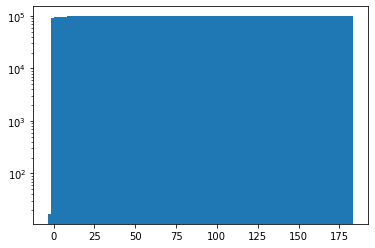

In [72]:
plt.hist(df_['novelty_tenth'].values,cumulative=True,log=True,bins=100)

In [ ]:
unit_of_analysis = 'posts'

dfs = []

for kol_level in range(5):
    fp = f'./results/{unit_of_analysis}_{kol_level}_tags_d.csv'
    dfs.append(pd.read_csv(fp,index_col='index'))
    
df = pd.concat(dfs)
df_ = df[df['n_tags']>1]
df_ = df_[~df_.isin([np.NaN,np.inf])]
test_regression(df_,
                DV='post_like',
                IV='novelty_tenth',
                controls=['if_video','if_cooperate','n_tags'],
                curvilinear=False)

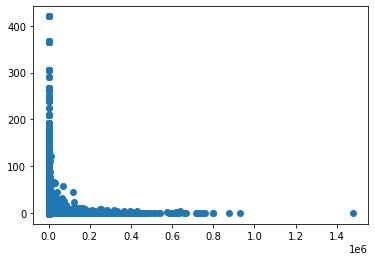

In [48]:
plt.scatter(df_['post_like'],df_['novelty_median'])
plt.show()

,datetime,crawl_date,post_comments,post_like,post_favorite_count,post_type,post_image_counts,collect,comment_keywords,if_video,...,n_tags,1_tags,n_topics,1_topics,kol_level,keywords,topics,tags,novelty_median,novelty_tenth
index,,,,,,,,,,,,,,,,,,,,,
62848df20000000021038cb7,2022-05-18,2022-05-19 02:20:01,1.0,6.0,7.0,images,"[""http://sns-img-hw.xhscdn.com/01025i013f26myy...",7.0,NaN,0,...,3,0,1,1,0,"['不错', '东京', '分享', '分量', '咸猪肉', '培根', '太多', '尝...",[149],"['5beb9ba5e3b6360001868948', '5bf4248927033400...",NaN,NaN
62fe43dd000000001b01ce25,2022-08-18,2022-08-19 15:12:13,0.0,6.0,0.0,video,"[""http://sns-img-qn.xhscdn.com/01028i013f26myy...",0.0,NaN,1,...,3,0,1,1,0,"['la', 'vida', 'vip', '东京', '内场', '可怜', '响起', ...",[140],"['5beceba85dda6900014e7918', '5c0be7800990ae00...",-0.223607,-0.223607
62d2e0a7000000002103d4f6,2022-07-17,2022-07-17 09:18:53,0.0,8.0,3.0,images,"[""http://sns-img-qn.xhscdn.com/01027g013f26myy...",3.0,NaN,0,...,4,0,1,1,0,"['一刻钟', '不好意思', '京都', '小时', '忽然间', '想着', '抓狂',...",[160],"['5be796b71cc2b500011a6c8e', '5befd72c51875e00...",-0.223607,-0.223607
628137f1000000002103567a,2022-05-16,2022-06-19 20:01:12,7.0,193.0,49.0,images,"[""http://sns-img-hw.xhscdn.com/01025g013f26myy...",49.0,NaN,0,...,3,0,1,1,0,"['一本', '京都', '入睡', '写作', '却静', '听见', '喜欢', '回忆...",[160],"['5a533df2800086073d68be9a', '5bf54504e1921600...",-0.409447,-0.409447
615028f40000000001025818,2021-09-26,2022-06-20 13:06:21,0.0,9.0,2.0,images,"[""https:////ci.xiaohongshu.com/f2afe8c3-45a8-d...",2.0,NaN,0,...,3,0,1,1,0,"['byredo', '大地', '奶茶', '巴黎', '很喜欢', '惊人', '成熟'...",[150],"['5be5b01c80b72a0001540c52', '5be956e485cfbb00...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623d663a000000002103e29d,2022-03-25,2022-03-26 06:13:45,31.0,1452.0,303.0,video,"[""http://ci.xiaohongshu.com/5e765956-a239-0048...",303.0,"{""厉害"":0.06,""都是"":0.03,""感觉"":0.03,""来源"":0.03,""灵感"":...",1,...,2,0,1,1,4,"['何水晶', '寻找', '小红书']",[140],"['5a438d9c8000860661720710', '60d304bf251dcf00...",NaN,NaN
622ac91c000000002103e653,2022-03-11,2022-03-18 02:51:26,53.0,2575.0,553.0,video,"[""http://ci.xiaohongshu.com/301740e6-cba1-672d...",553.0,"{""欣赏"":0.02,""太好看"":0.02,""画工"":0.02,""母亲"":0.04,""天花板...",1,...,3,0,1,1,4,"['何水晶', '寻找', '长青']",[141],"['5a438d9c8000860661720710', '5be3f598a5142900...",-0.223607,-0.223607
62500c99000000000102435f,2022-04-08,2022-04-11 06:13:52,318.0,20437.0,6193.0,video,"[""http://sns-img-hw.xhscdn.com/01024801kmfnmmj...",6193.0,"{""浪费"":0.05,""希望"":0.02,""享受"":0.02,""家的"":0.01,""感觉"":...",1,...,2,0,1,1,4,"['何水晶', '寻找', '灵感']",[147],"['5a438d9c8000860661720710', '60d304bf251dcf00...",NaN,NaN
